In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Audio

import librosa as li
import librosa.display

In [3]:
# import the sound file.
sound , sample_rate = li.load('Guitar R_06.wav')

print(sample_rate, ' = Sample Rate')

audio = Audio(data=sound, rate=sample_rate)
audio
sound = li.to_mono(sound)
#print('Sound: ', sound)
zero_cross = li.zero_crossings(sound) # boolean matrix of zero crossing.

22050  = Sample Rate
Sound:  [ -4.42131750e-05  -6.69013316e-05  -5.68264622e-05 ...,  -4.45950500e-05
  -4.50763437e-05   0.00000000e+00]


In [4]:
# Estimate tempo of track 
tempo, beats = li.beat.beat_track(y=sound, sr = sample_rate)
sound_beats = li.clicks(frames=beats, sr=sample_rate)
Audio(data=sound_beats, rate = sample_rate)

# Or use "times"
#times = li.frames_to_time(beats, sr=sample_rate)
#sound_beats = li.clicks(times=times, sr=sample_rate)
#Audio(data=sound_beats, rate = sample_rate)

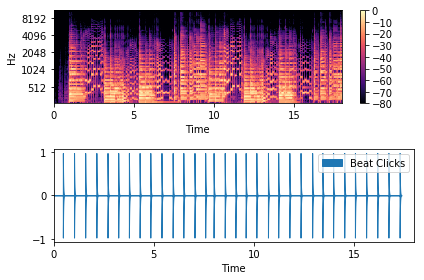

In [4]:
plt.figure()
sig = li.feature.melspectrogram(y=sound, sr=sample_rate)
ax = plt.subplot(2,1,1)
li.display.specshow(li.power_to_db(sig, ref=np.max),
                x_axis='time', y_axis='mel')
plt.colorbar()

plt.subplot(2,1,2, sharex=ax)
li.display.waveplot(sound_beats, sr=sample_rate, label='Beat Clicks')


'''plt.subplot(3,1,3, title='Tempogram')
plt.figure()
Tgram = li.feature.tempogram(y=sound, sr=sample_rate)
li.display.specshow(Tgram, x_axis='time', y_axis='Hz')
'''

plt.legend()
plt.xlim(0,18)
plt.tight_layout()

plt.plot()
plt.show()

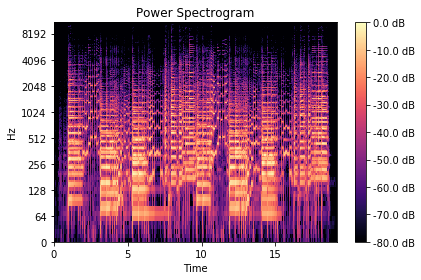

In [5]:
n = len(sound)
n_fft = 2048
pad = li.util.fix_length(sound, n+n_fft //2)
trans = li.core.stft(pad, n_fft = n_fft)
#plt.plot(trans)
#plt.show()
li.display.specshow(li.amplitude_to_db(trans, ref=np.max),
                   y_axis='log', x_axis='time')
plt.title('Power Spectrogram')
plt.colorbar(format='%+1.5a dB')
plt.tight_layout()
plt.show()

In [6]:
back_to_sound = li.istft(trans, length=n)
np.max(np.abs(sound - back_to_sound))

Audio(back_to_sound, rate = sample_rate)

c:\program files\python36\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


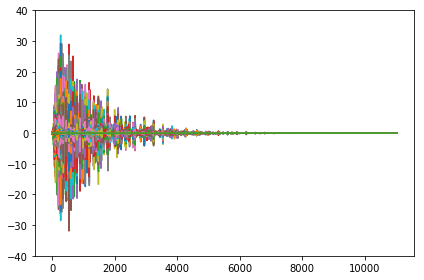

In [17]:
# sound = matrix of sound
# sample_rate = sample rate
plt.figure()
frequencies, D = li.ifgram(sound, sr=sample_rate)
plt.plot(frequencies, D)
plt.ylim(-40,40)
plt.tight_layout()
plt.show()

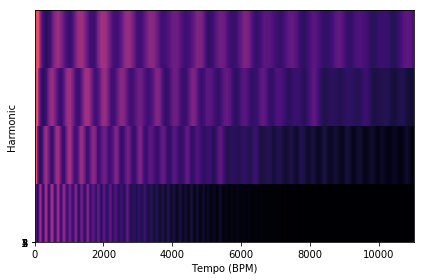

In [9]:
# Harmonics
# sound, sample_rate
tempi = np.mean(li.feature.tempogram(y=sound, sr=sample_rate), axis=1)
# first 5 harmonics
harmony_range = [1,2,3,4,5]
f_tempo = li.tempo_frequencies(len(tempi), sr=sample_rate)
# Build harmonic tensor
t_harmonics = li.interp_harmonics(tempi, f_tempo, harmony_range)
print(t_harmonics.shape)

# plot the harmonics
plt.figure()
li.display.specshow(t_harmonics, x_axis='linear', y_axis='linear', sr= sample_rate)
plt.yticks(0.5 + np.arange(len(harmony_range)),
          ['{:.3g}'.format(_) for _ in harmony_range])
plt.ylabel('Harmonic')
plt.xlabel('Tempo (BPM)')
plt.tight_layout()
plt.show()

Salience dimensions:  (1025, 823)


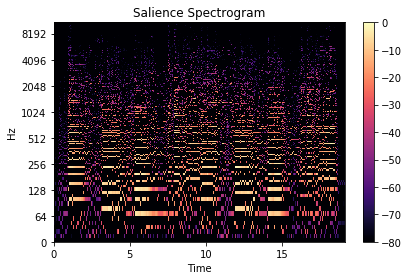

In [15]:
# sound, sample_rate
S = np.abs(li.stft(sound))
freqs = li.core.fft_frequencies(sample_rate)
harms = [1,2,3]
weights = [1.0, 0.5, 0.33]
S_sal = li.salience(S, freqs, harms, weights, fill_value=0)
print('Salience dimensions: ', S_sal.shape)

plt.figure()
li.display.specshow(li.amplitude_to_db(S_sal, ref=np.max),
                    sr= sample_rate,
                    y_axis='log',
                    x_axis='time')
plt.colorbar()
plt.title('Salience Spectrogram')
plt.tight_layout()
plt.show()